In [1]:
import pandas as pd

df = pd.read_csv('../data/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
df.shape

(16, 4)

In [4]:
df['degree'].unique()

array(['bachelors', 'masters'], dtype=object)

In [5]:
df['degree_number'] = df['degree'].map({'bachelors':1 , 'masters':2})
df.head(5)

,company,job,degree,salary_more_then_100k,degree_number
0,google,sales executive,bachelors,0,1
1,google,sales executive,masters,0,2
2,google,business manager,bachelors,1,1
3,google,business manager,masters,1,2
4,google,computer programmer,bachelors,0,1


In [6]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

label = LabelEncoder()

df['degree_number2'] = label.fit_transform(df['degree'])
df.head()

,company,job,degree,salary_more_then_100k,degree_number,degree_number2
0,google,sales executive,bachelors,0,1,0
1,google,sales executive,masters,0,2,1
2,google,business manager,bachelors,1,1,0
3,google,business manager,masters,1,2,1
4,google,computer programmer,bachelors,0,1,0


In [8]:
df.drop(columns=(['degree','degree_number2']),axis=1,inplace=True)

In [15]:
df_encoder = pd.get_dummies(data=df,columns=['company','job'],dtype=int,drop_first=True)
df_encoder

,salary_more_then_100k,degree_number,company_facebook,company_google,job_computer programmer,job_sales executive
0,0,1,0,1,0,1
1,0,2,0,1,0,1
2,1,1,0,1,0,0
3,1,2,0,1,0,0
4,0,1,0,1,1,0
5,1,2,0,1,1,0
6,0,2,0,0,0,1
7,0,1,0,0,1,0
8,0,1,0,0,0,0
9,1,2,0,0,0,0


In [16]:
from sklearn.tree import DecisionTreeClassifier

x = df_encoder.drop('salary_more_then_100k',axis=1)
y = df_encoder['salary_more_then_100k']

model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(x)
report = classification_report(y,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [19]:
from sklearn.tree import export_text

print(export_text(model,feature_names=list(x.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |--- company_google <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- company_google >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



[Text(0.75, 0.9166666666666666, 'x[1] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.625, 0.75, 'x[4] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.6875, 0.8333333333333333, 'True  '),
 Text(0.5, 0.5833333333333334, 'x[0] <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.375, 0.4166666666666667, 'x[3] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.25, 0.25, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0.75, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8125, 0.8333333333333333, '  False')]

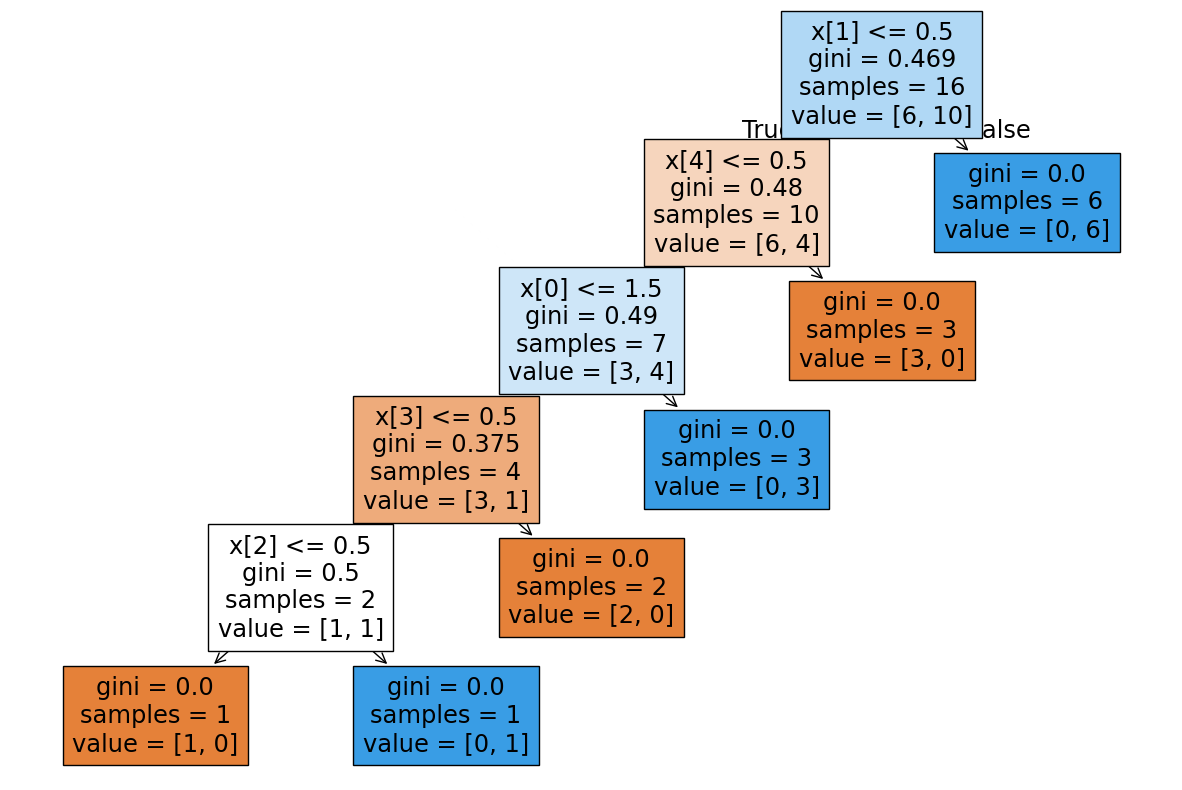

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [22]:
x = df_encoder.drop('salary_more_then_100k',axis=1)
y = df_encoder['salary_more_then_100k']

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x,y)

print(export_text(model,feature_names=list(x.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- company_google <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- company_google >  0.50
|   |   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



[Text(0.7142857142857143, 0.9166666666666666, 'x[1] <= 0.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.5714285714285714, 0.75, 'x[4] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.6428571428571428, 0.8333333333333333, 'True  '),
 Text(0.42857142857142855, 0.5833333333333334, 'x[0] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.2857142857142857, 0.4166666666666667, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.14285714285714285, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.42857142857142855, 0.25, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2857142857142857, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.4166666666666667, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7142857142857143, 0.5833333333333334, 'entropy = 0.0\nsampl

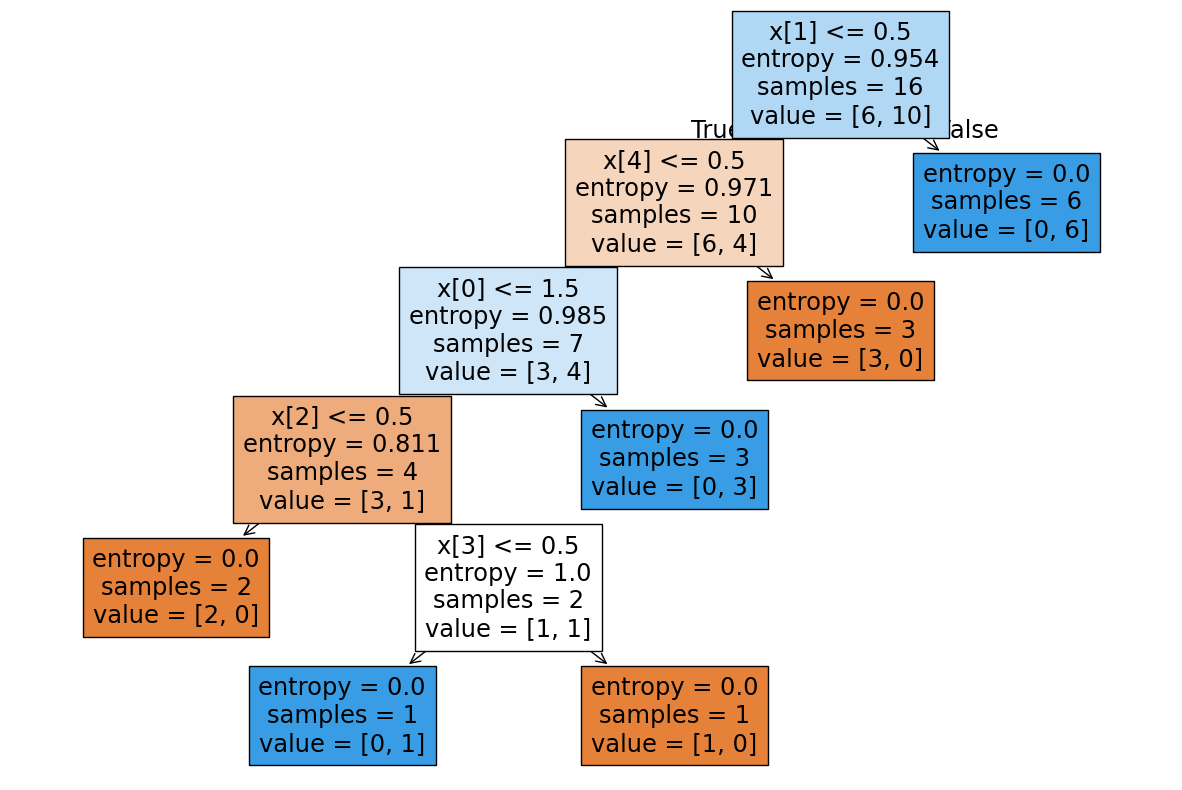

In [23]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)